## IMPORTING LIBRARIES

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# DATA AUGMENTATION

In [ ]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)

## LOADING THE DATASET

In [ ]:
train_set = train.flow_from_directory(r'/content/drive/MyDrive/Data/cats_vs_dogs/train',
                                      target_size = (224,224),
                                      class_mode = 'binary')

test_set = test.flow_from_directory(r'/content/drive/MyDrive/Data/cats_vs_dogs/test',
                                      target_size = (224,224),
                                      class_mode = 'binary')

Found 400 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


## MODEL BUILDING

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

## MODEL SUMMARY

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 186624)            0         
                                                                 
 dense_18 (Dense)            (None, 128)              

## MODEL COMPILATION

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## MODEL TRAINING

In [ ]:
history = model.fit(train_set, epochs=15, validation_data=test_set)

Epoch 1/15
13/13 [==============================] - 4s 132ms/step - loss: 0.7975 - accuracy: 0.5200 - val_loss: 0.6413 - val_accuracy: 0.6000
Epoch 2/15
13/13 [==============================] - 1s 94ms/step - loss: 0.6715 - accuracy: 0.6250 - val_loss: 0.6023 - val_accuracy: 0.7000
Epoch 3/15
13/13 [==============================] - 1s 89ms/step - loss: 0.6140 - accuracy: 0.6425 - val_loss: 0.5919 - val_accuracy: 0.7000
Epoch 4/15
13/13 [==============================] - 1s 100ms/step - loss: 0.5798 - accuracy: 0.6850 - val_loss: 0.6378 - val_accuracy: 0.5250
Epoch 5/15
13/13 [==============================] - 1s 92ms/step - loss: 0.4991 - accuracy: 0.7975 - val_loss: 0.5741 - val_accuracy: 0.7250
Epoch 6/15
13/13 [==============================] - 1s 97ms/step - loss: 0.4386 - accuracy: 0.8400 - val_loss: 0.5063 - val_accuracy: 0.7250
Epoch 7/15
13/13 [==============================] - 1s 102ms/step - loss: 0.3928 - accuracy: 0.8950 - val_loss: 0.4899 - val_accuracy: 0.7000
Epoch 8/15

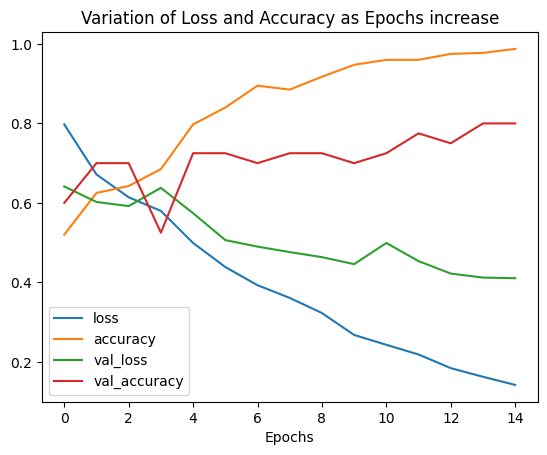

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.xlabel("Epochs")
plt.title("Variation of Loss and Accuracy as Epochs increase")
plt.show()